In [3]:
import os
import librosa, librosa.display
import matplotlib.pyplot as plt
import  pandas as pd
from pathlib import Path
import pickle
from audio import AudioFeature
import tensorflow as tf
import tensorflow_io as tfio
import IPython.display as ipd
import numpy as np
import seaborn as sns
from pydub import AudioSegment


In [5]:
file_path = "datasets/belly_pain/69BDA5D6-0276-4462-9BF7-951799563728-1436936185-1.1-m-26-bp.wav"

In [6]:

# Load files
audio_segment = AudioSegment.from_file(file_path)
# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 8000
Frame width: 2
Length (ms): 7000
Frame count: 56000.0
Intensity: -12.922017084012495


## Spectrorgram


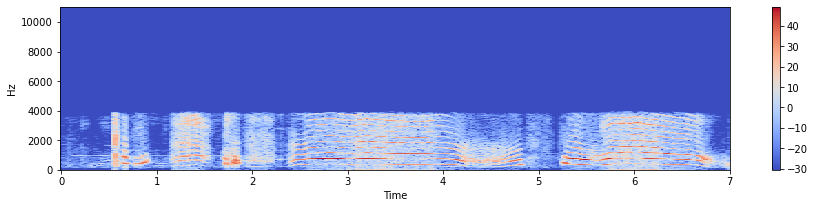

In [7]:
x, sr = librosa.load(file_path)
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

## Root Mean square

[Text(0.5, 1.0, 'log Power spectrogram')]

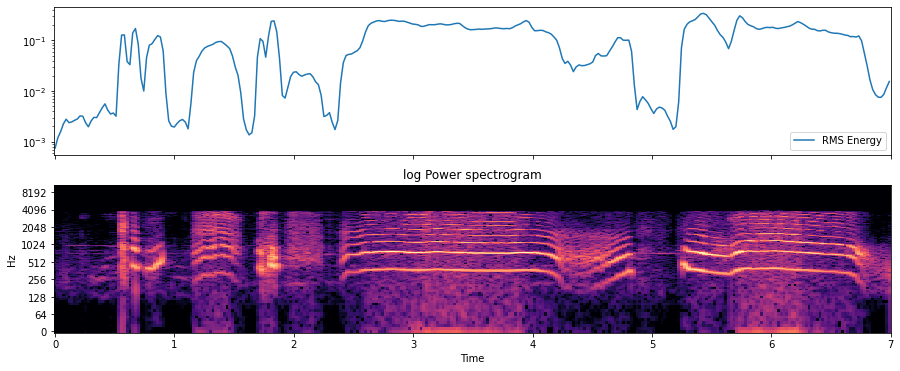

In [10]:
y, sr = librosa.load(file_path)
# Get RMS value from each frame's magnitude value
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

## Zero crossing ray

Zero crossing rate: 12837


Text(0.5, 1.0, 'belly_pain')

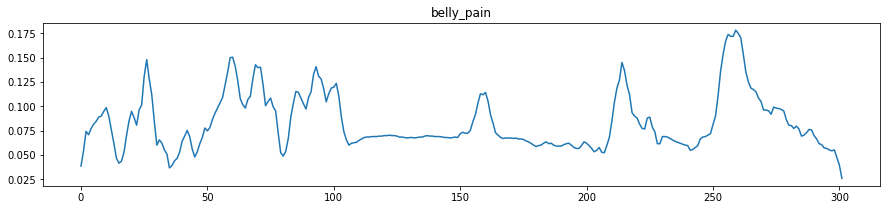

In [11]:
y, sr = librosa.load(file_path)
zcrs = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(y))}")
plt.figure(figsize=(15, 3))
plt.plot(zcrs[0])
plt.title('belly_pain')

# Mel-Frequency Cepstral Coefficients (MFCCs)

C:\Users\Near\AppData\Local\Temp/ipykernel_12504/3149922648.py:2: FutureWarning: Pass y=[-1.9216411e-04  6.8480127e-05  3.8098509e-04 ... -2.4385195e-02
 -1.9063454e-02 -9.6030058e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


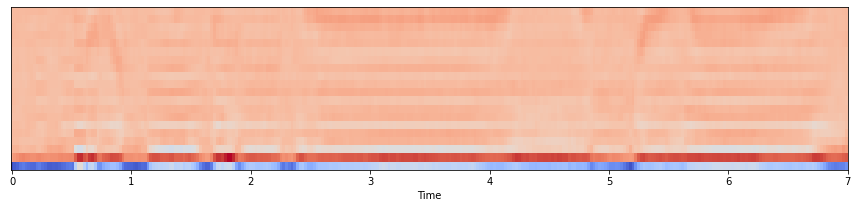

In [12]:
x, sr = librosa.load(file_path)
mfccs = librosa.feature.mfcc(x, sr=sr)
# Displaying  the MFCCs:
plt.figure(figsize=(15, 3))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Chroma

C:\Users\Near\AppData\Local\Temp/ipykernel_12504/1623291840.py:2: FutureWarning: Pass y=[-1.9216411e-04  6.8480127e-05  3.8098509e-04 ... -2.4385195e-02
 -1.9063454e-02 -9.6030058e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


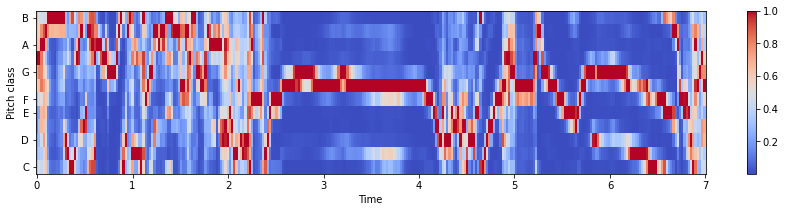

In [20]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
fig.colorbar(img, ax=ax)

# Tempogram

In [17]:
# y, sr = librosa.load(file_path)
# hop_length = 41
# # Compute local onset autocorrelation
# oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
# times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
# tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
#                                       hop_length=hop_length)
# # Estimate the global tempo for display purposes
# tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
#                            hop_length=hop_length)[0]